<a href="https://colab.research.google.com/github/juanC0627/aLATAM/blob/main/Mentoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Desafíos de la clase 1**

1. Promedio de área de todos los inmuebles en los barrios en el dataset. El top 10.

2. Consultar otros datos estadísticos, conteo, mediana, valores mínimo y máximo.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

inmuebles = pd.read_csv('/content/drive/MyDrive/inmersion_datos/inmuebles_bogota.csv') 
columnas = {'Baños':'Banos','Área':'Area'}
inmuebles = inmuebles.rename(columns=columnas)

<Axes: xlabel='Barrio'>

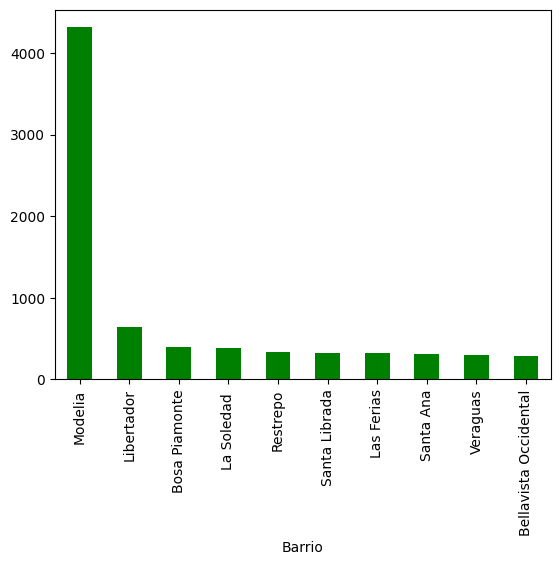

In [ ]:
#Solución 1
promedio_area = inmuebles.groupby('Barrio')['Area'].mean()
promedio_area.sort_values(ascending=False).head(10).plot.bar(color="green")

<Axes: xlabel='Barrio'>

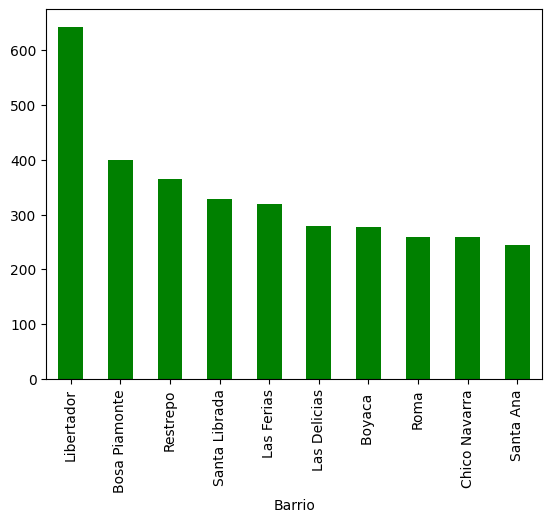

In [ ]:
#Solución 2
promedio_area = inmuebles.groupby('Barrio')['Area'].median()
promedio_area.sort_values(ascending=False).head(10).plot.bar(color="green")

<Axes: xlabel='Barrio'>

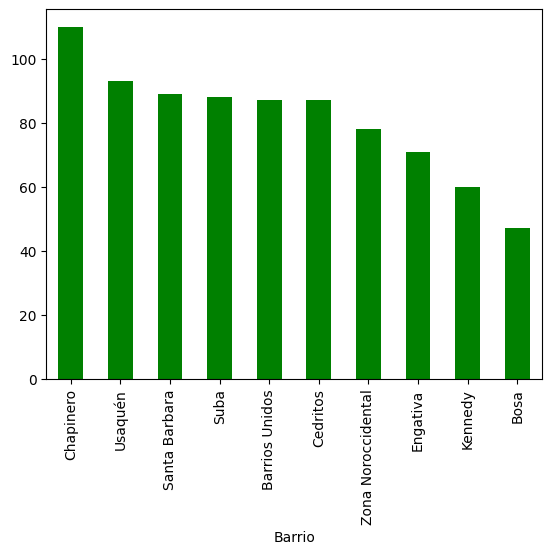

In [ ]:
#Promedio de área del top 10 de barrios
top_10 = inmuebles.Barrio.value_counts().head(10).index
top_10 = inmuebles[inmuebles.Barrio.isin(top_10)]
promedio_area = top_10.groupby('Barrio')['Area'].median()
promedio_area.sort_values(ascending=False).plot.bar(color="green")

In [ ]:
#inmuebles.describe()
#inmuebles.groupby('Barrio')['Area'].describe()
#inmuebles.groupby('Barrio')['Habitaciones'].describe()
#inmuebles.groupby('Barrio')['Banos'].describe()

,count,mean,std,min,25%,50%,75%,max
Barrio,,,,,,,,
Alameda,1.0,3.000000,NaN,3.0,3.0,3.0,3.00,3.0
Alhambra,17.0,3.000000,0.866025,1.0,3.0,3.0,4.00,4.0
Andes Norte,7.0,3.000000,1.000000,1.0,3.0,3.0,3.50,4.0
Antonio Nariño,48.0,4.312500,3.102204,1.0,3.0,3.0,5.00,14.0
Barrancas,15.0,2.866667,0.351866,2.0,3.0,3.0,3.00,3.0
...,...,...,...,...,...,...,...,...
Villa Maria,13.0,4.692308,0.751068,3.0,5.0,5.0,5.00,5.0
Villas De Granada,22.0,3.454545,0.857864,3.0,3.0,3.0,3.75,6.0
Villemar,18.0,2.944444,1.161754,2.0,2.0,3.0,3.00,7.0


##**Desafíos de la clase 2**

1. Estudiar mejor el histograma de valores, seleccionar 3 tipos de inmuebles (Refinar el gráfico: Títulos, aumentar el tamaño de labels, colores, conclusión de la información)

2. Precio del m2 por barrio y hacer el gráfico más adecuado para esta nueva variable.

In [ ]:
valor = inmuebles.Valor.str.split(expand=True)
inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True)
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

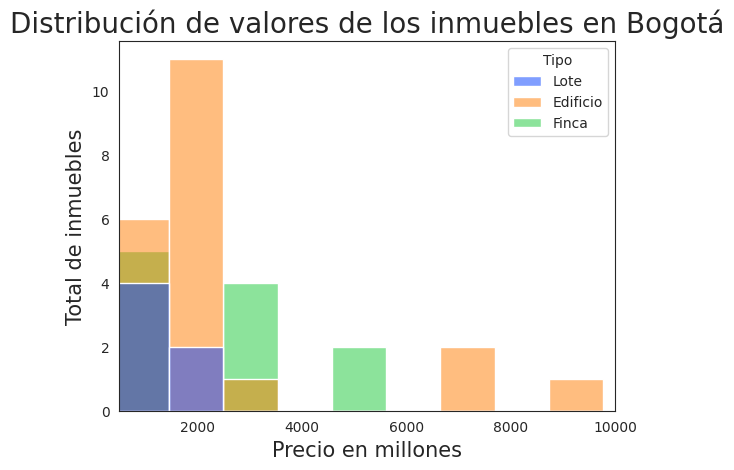

In [ ]:
# Enviado por dfigueroa13

# Establecer un tema
sns.set_style("white")
sns.set_palette("bright")
sns.color_palette("cubehelix", as_cmap=True)

#font = {'family' : 'League Gothic Regular', 'weight' : 'normal', 'size'   : 12}
#plt.rc('font', **font)

#plt.ylim((0,300))
plt.xlim((500,10000)) #Se configura el limite minimo y maximo
# Gráfico
grafica5 = sns.histplot(data=inmuebles.query("Tipo in ['Lote','Edificio','Finca']"), 
                        x='Precio_Millon',hue='Tipo',fill=True,kde=False)#,multiple="dodge",element="step")
# Personaliza el histograma
grafica5.set_title('Distribución de valores de los inmuebles en Bogotá', fontsize=20)#, font=font)
grafica5.set_xlabel('Precio en millones', fontsize=15)
grafica5.set_ylabel('Total de inmuebles', fontsize=15)
plt.show()
#plt.savefig('/content/drive/MyDrive/Inmersión de Datos/Desafio2.png',format='png')

1. Según la gráfica sólo un numero limitado de Lotes estan disponibles en un rango de precio desde los 500 a los 2000 millones de pesos colombianos.
2. Fincas hay disponibles solo en el precio de 2000, 4000 y 6000 millones
3. Edificio es lo que mas hay disponible de estos 3 tipos de edificios, habiendo varias mas existencias en rango de precio de 0 a 2000 millones, en el rango de 8000 y 10,000 millones.

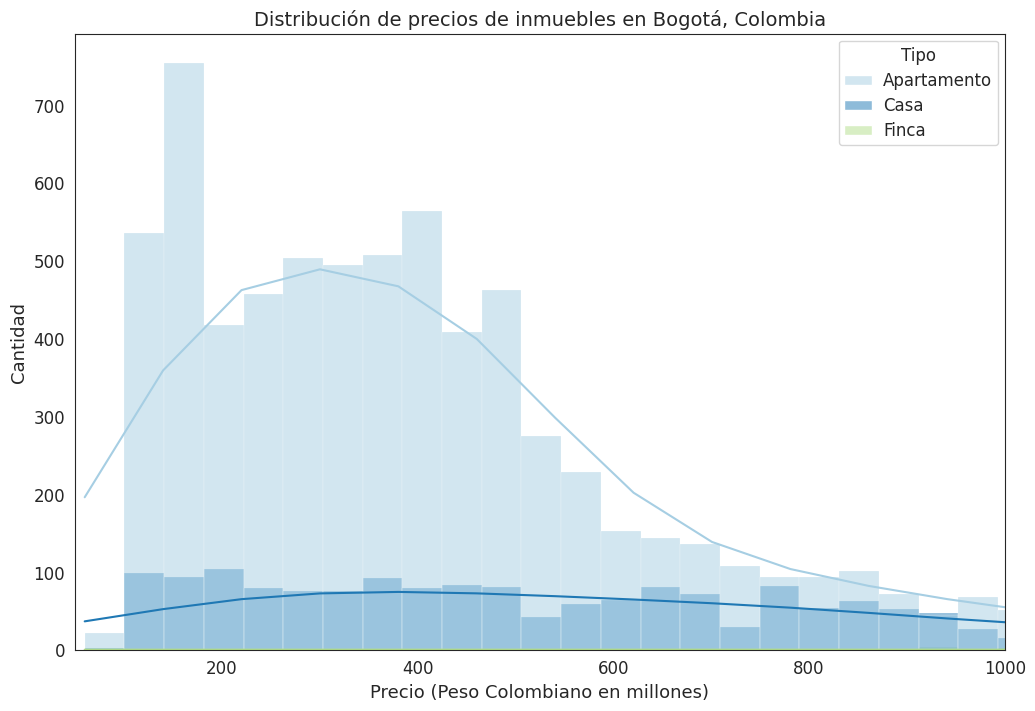

In [ ]:
#Enviado Por Maximiliano Gastón

plt.figure(figsize=(12,8))

g = sns.histplot(x="Precio_Millon",
                 kde=True,
                 hue="Tipo",
                 hue_order=["Apartamento", "Casa", "Finca"],
                 palette="Paired",
                 data=inmuebles)

g.set_title("Distribución de precios de inmuebles en Bogotá, Colombia", fontsize=14)

plt.setp(g.get_legend().get_title(), fontsize=12)
plt.setp(g.get_legend().get_texts(), fontsize=12)

plt.xlim((50, 1000))
g.set_xlabel("Precio (Peso Colombiano en millones)", fontsize=13)
g.set_ylabel("Cantidad", fontsize=13)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("dia2_desafio1.png", format="png")

plt.show()

**Conclusión**:
El análisis del gráfico revela una gran diferencia en la oferta de apartamentos y casas en los estratos de precios más bajos, siendo la oferta de apartamentos hasta 7 veces mayor que la de las casas.

A medida que los precios aumentan, se observa una disminución en la brecha de la oferta de casas y apartamentos y, en los estratos de precios más altos, la cantidad de casas y apartamentos es muy similar. Esto sugiere que el mercado de venta de inmuebles de alta gama en Bogotá es equilibrado en términos de la oferta de casas y apartamentos.

En el caso de las fincas, su oferta es significativamente baja en todos los estratos de precios. Por lo tanto, se puede concluir que el mercado de venta de fincas en Bogotá es relativamente limitado en comparación con el de casas y apartamentos.

##**Extra**

Abrir los archivos de forma automática.

In [ ]:
tablas=['Identificación (Capítulo A).csv',
        'Datos de la vivenda y su entorno (Capítulo B).csv',
        'Condiciones habitacionales del hogar (Capítulo C).csv',
        'Composición del hogar y demografía (Capítulo E).csv',
        'Educación (Capítulo H).csv',
        'Fuerza de trabajo (Capítulo K).csv',
        'Percepción sobre las condiciones de vida y el desempeño institucional (Capítulo L).csv']

archivos=[]

for t in tablas:
  datos = pd.read_csv(f'/content/drive/MyDrive/inmersion_datos/{t}', 
                  sep = ';',encoding='latin-1',low_memory=False)
  archivos.append(datos)

datos_a,datos_b,datos_c,datos_e,datos_h,datos_k,datos_l = archivos[:7] 

###**ipywidgets**
https://ipywidgets.readthedocs.io/en/latest/

In [ ]:
columnas_categoricas = ['Tipo','Barrio','UPZ']

In [ ]:
from ipywidgets import interact
import ipywidgets as widgets

menu = widgets.Dropdown(options=columnas_categoricas,
                        value=columnas_categoricas[0],
                        description='Selecciona una columna')

def histograma(columna):
  g = sns.histplot(x=columna,                 
                 data=top_10)
  if len(inmuebles[columna].unique()) > 4:
    g.tick_params(axis='x',rotation=90)
  plt.show()

interact(histograma,columna=menu)

interactive(children=(Dropdown(description='Selecciona una columna', options=('Tipo', 'Barrio', 'UPZ'), value=…

<function __main__.histograma(columna)>